# Advanced Macroeconomics 1: Homework 1

## Settings

In [1]:
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical operations
import matplotlib.pyplot as plt  # Data visualization

import statsmodels.api as sm  # Statistical models
from statsmodels.tsa.stattools import adfuller, acf, pacf  # Time series analysis tools
from statsmodels.tsa.arima.model import ARIMA  # ARIMA model for time series forecasting

from statsmodels.graphics.tsaplots import plot_acf # Autocorrelation Function ( ACF )
from statsmodels.graphics.tsaplots import plot_pacf # Partial Autocorrelation Function (PACF
from statsmodels.stats.diagnostic import acorr_ljungbox

import seaborn as sns

import warnings

import ipeadatapy as ipea


import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
rgb_color = (162 / 255, 37 / 255, 56 / 255)  # Red

In [3]:
warnings.filterwarnings("ignore")

## Questions

### Question 1
Using the data file **dados_hmw_1.xls** and the software of your choice, apply the **Box Jenkins** methodology. You should:



#### Data

In [4]:
# Load the data
file_path = r"C:\Users\USER\OneDrive\Github\AdvancedMacroeconomics\Homework1\dados_hmw_1.xls"
df = pd.read_excel(file_path)

# Set index to a RangeIndex
df.index = pd.RangeIndex(start=0, stop=len(df), step=1)

#### i. Plot the series

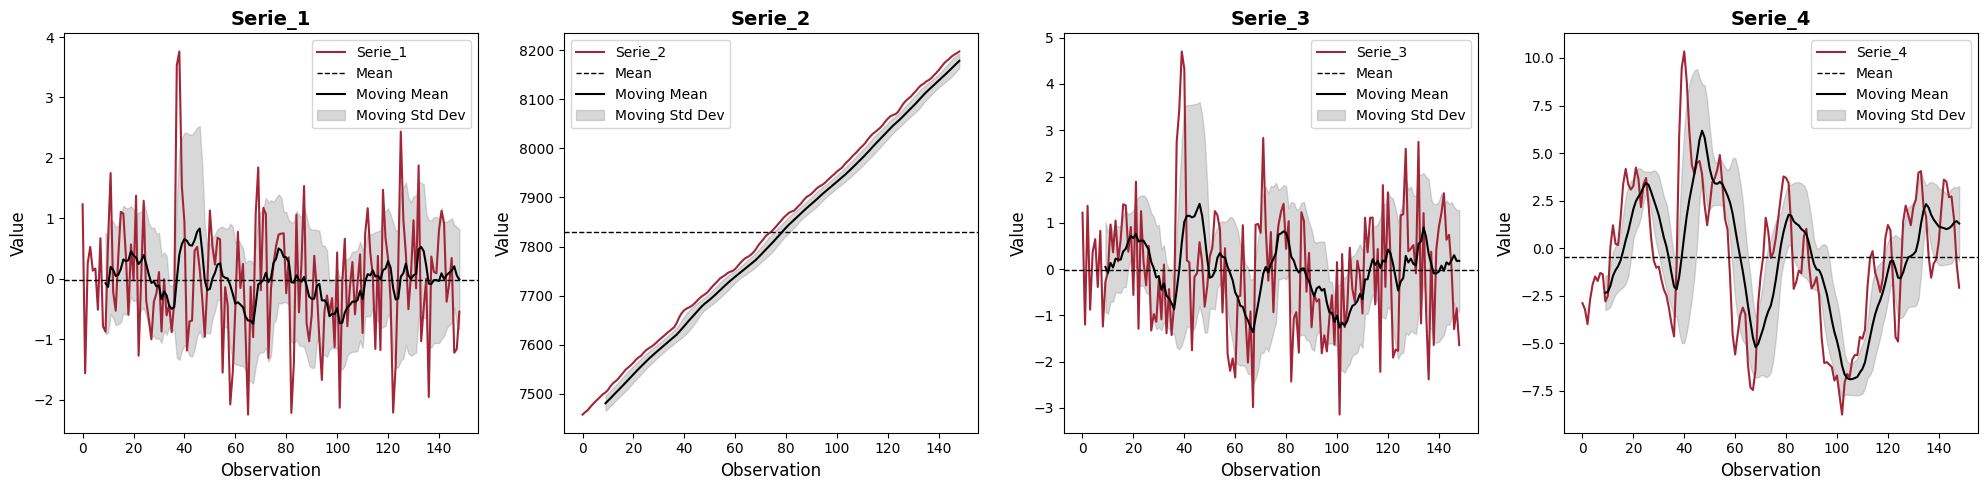

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the Excel file
df = pd.read_excel("dados_hmw_1.xls", sheet_name="Sheet1")

# Define the columns of the original series (assuming they are the first 4)
series_columns = df.columns[:4]

# Set the window size for the moving average and moving standard deviation
window_size = 10

# Create side-by-side subplots (1 row, one column for each series)
fig, axes = plt.subplots(1, len(series_columns), figsize=(5 * len(series_columns), 5), sharex=True)

# If there is only one series, wrap the axis in a list to maintain the loop
if len(series_columns) == 1:
    axes = [axes]

# Loop to generate the plot for each series
for ax, column in zip(axes, series_columns):
    # Calculate the moving average and moving standard deviation locally
    moving_mean = df[column].rolling(window=window_size).mean()
    moving_std = df[column].rolling(window=window_size).std()
    
    # Calculate the overall mean of the original series
    mean_value = df[column].mean()
    
    # Plot the original series
    ax.plot(df.index, df[column], label=column, color = rgb_color ,linewidth=1.5)
    
    # Draw a horizontal line indicating the mean
    ax.axhline(mean_value, color='black', linestyle='--', linewidth=1, label='Mean')
    
    # Plot the moving average
    ax.plot(df.index, moving_mean, color='black', linewidth=1.5, linestyle='-', label='Moving Mean')
    
    # Plot the moving standard deviation band
    ax.fill_between(df.index, moving_mean - moving_std, moving_mean + moving_std, 
                    color='grey', alpha=0.3, label='Moving Std Dev')
    
    # Remove background and extra borders using the current subplot (ax)
    ax.set_facecolor('white')         # Remove background color
    
    # Set title, labels, and grid
    ax.set_title(column, fontsize=14, fontweight='bold')
    ax.set_xlabel("Observation", fontsize=12)
    ax.set_ylabel("Value", fontsize=12)
    ax.legend()
    ax.grid(False)

plt.tight_layout()
plt.show()


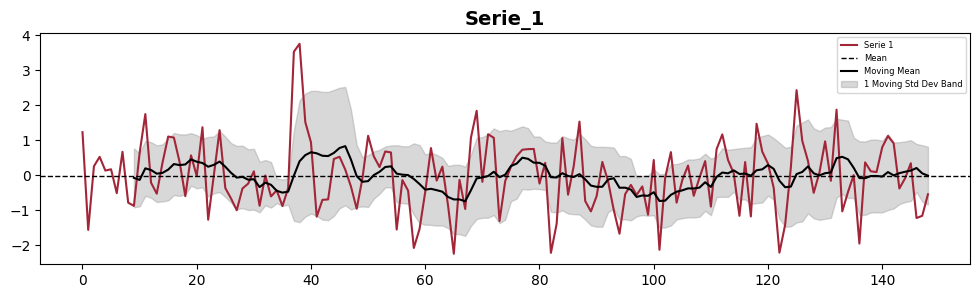

In [6]:
# Graph for specific serie
column = "Serie_1"

# Define the moving window size
window_size = 10

# Calculate moving average and moving standard deviation
df['Moving_Mean'] = df[column].rolling(window=window_size).mean() # Not using
df['Moving_Std'] = df[column].rolling(window=window_size).std()

# Calculate mean and standard deviation
mean_value = df[column].mean()
std_dev = df[column].std()

# Create the plot
plt.figure(figsize=(12, 3))
plt.plot(df.index, df[column], color=rgb_color, linewidth=1.5, label="Serie 1")
plt.axhline(mean_value, color='black', linestyle='--', linewidth=1, label='Mean')  # Dotted line for mean

# Plot standard deviation bands
#plt.fill_between(df.index, mean_value - std_dev, mean_value + std_dev, color='gray', alpha=0.3, label='1 Std Dev Band')

# Plot moving average
plt.plot(df.index, df['Moving_Mean'], color='black', linewidth=1.5, linestyle='-', label="Moving Mean")

# Plot moving standard deviation bands
plt.fill_between(df.index, 
                 df['Moving_Mean'] - df['Moving_Std'], 
                 df['Moving_Mean'] + df['Moving_Std'], 
                 color='grey', alpha=0.3, label='1 Moving Std Dev Band')

# Add titles and labels
plt.title(column, fontsize=14, fontweight='bold')
plt.xlabel('', fontsize=12)
plt.ylabel('', fontsize=14)
plt.legend(fontsize = 6)
plt.show()

- **Series 1**: The values seem to oscillate around a nearly constant mean (no clear growth or decline is observed over time).  
  The variance appears to be relatively stable.  
  In principle, it does not seem to show a significant trend.

- **Series 4**: There is a clearly increasing pattern, suggesting a strong positive deterministic trend.  
  We will likely need to remove or model this trend before applying the Box-Jenkins methodology.

- **Series 3**: Oscillates around a value close to 0 or 1.  
  Does not appear to show a pronounced trend.  
  The variance also seems reasonably stable.

- **Series 4**: Shows wider oscillations but without a clear upward or downward direction over time.  
  The variance does not seems reasonably stable  
  Apparently, there is also no defined trend.

In [7]:
# Descriptive Analysis

columns = ['Serie_1', 'Serie_2', 'Serie_3', 'Serie_4']

# Loop to calculate and display statistics for each column
for col in columns:
    mean = df[col].mean()
    median = df[col].median()
    std_dev = df[col].std()
    variance = df[col].var()
    range_ = df[col].max() - df[col].min()
    percentile_10 = df[col].quantile(0.10)
    percentile_40 = df[col].quantile(0.40)
    percentile_70 = df[col].quantile(0.70)
    
    print(f'Statistics for {col}:')
    print(f'  Mean:           {mean:.2f}')
    print(f'  Median:         {median:.2f}')
    print(f'  Standard Dev.:  {std_dev:.2f}')
    print(f'  Variance:       {variance:.2f}')
    print(f'  Range:          {range_:.2f}')
    print(f'  Percentile 10:  {percentile_10:.2f}')
    print(f'  Percentile 40:  {percentile_40:.2f}')
    print(f'  Percentile 70:  {percentile_70:.2f}')
    print('-' * 40)

Statistics for Serie_1:
  Mean:           -0.02
  Median:         -0.07
  Standard Dev.:  1.01
  Variance:       1.02
  Range:          6.01
  Percentile 10:  -1.19
  Percentile 40:  -0.27
  Percentile 70:  0.43
----------------------------------------
Statistics for Serie_2:
  Mean:           7829.54
  Median:         7829.48
  Standard Dev.:  215.25
  Variance:       46331.30
  Range:          740.81
  Percentile 10:  7535.30
  Percentile 40:  7751.25
  Percentile 70:  7971.19
----------------------------------------
Statistics for Serie_3:
  Mean:           -0.02
  Median:         0.14
  Standard Dev.:  1.34
  Variance:       1.80
  Range:          7.85
  Percentile 10:  -1.76
  Percentile 40:  -0.42
  Percentile 70:  0.64
----------------------------------------
Statistics for Serie_4:
  Mean:           -0.46
  Median:         -0.58
  Standard Dev.:  3.72
  Variance:       13.80
  Range:          19.10
  Percentile 10:  -5.89
  Percentile 40:  -1.52
  Percentile 70:  1.66
---------

#### ii. Check whether the series exhibit a trend. If they do, you must use one of two approaches before proceeding:
- Remove it before applying the BJ methodology.  
- Include the trend, if applicable, in the model estimation.

Testing for Stationarity Using the Dickey-Fuller Method

In [8]:
# Options for the regression parameter:
# 'c'   : constant only (default)
# 'ct'  : constant and trend
# 'ctt' : constant, trend, and quadratic trend
# 'nc'  : no constant, no trend

# Analyze Serie_1
print("=== Analyzing Serie_1 ===")
result_serie1 = adfuller(df['Serie_1'].dropna(), regression='c')
adf_stat1 = result_serie1[0]
p_value1 = result_serie1[1]
print(f'ADF Statistic: {adf_stat1}')
print(f'p-value: {p_value1}')
if p_value1 > 0.05:
    print("-> The series is NOT stationary (p-value > 0.05). Differentiation may be required.")
else:
    print("-> The series is stationary (p-value ≤ 0.05).")

# Analyze Serie_2
print("\n=== Analyzing Serie_2 ===")
result_serie2 = adfuller(df['Serie_2'].dropna(), regression='ct')
adf_stat2 = result_serie2[0]
p_value2 = result_serie2[1]
print(f'ADF Statistic: {adf_stat2}')
print(f'p-value: {p_value2}')
if p_value2 > 0.05:
    print("-> The series is NOT stationary (p-value > 0.05). Differentiation may be required.")
else:
    print("-> The series is stationary (p-value ≤ 0.05).")

# Analyze Serie_3
print("\n=== Analyzing Serie_3 ===")
result_serie3 = adfuller(df['Serie_3'].dropna(), regression='c')
adf_stat3 = result_serie3[0]
p_value3 = result_serie3[1]
print(f'ADF Statistic: {adf_stat3}')
print(f'p-value: {p_value3}')
if p_value3 > 0.05:
    print("-> The series is NOT stationary (p-value > 0.05). Differentiation may be required.")
else:
    print("-> The series is stationary (p-value ≤ 0.05).")

# Analyze Serie_4
print("\n=== Analyzing Serie_4 ===")
result_serie4 = adfuller(df['Serie_4'].dropna(), regression='c')
adf_stat4 = result_serie4[0]
p_value4 = result_serie4[1]
print(f'ADF Statistic: {adf_stat4}')
print(f'p-value: {p_value4}')
if p_value4 > 0.05:
    print("-> The series is NOT stationary (p-value > 0.05). Differentiation may be required.")
else:
    print("-> The series is stationary (p-value ≤ 0.05).")

=== Analyzing Serie_1 ===
ADF Statistic: -7.405184861084389
p-value: 7.376670858801128e-11
-> The series is stationary (p-value ≤ 0.05).

=== Analyzing Serie_2 ===
ADF Statistic: -2.8013069307310876
p-value: 0.1964648332562457
-> The series is NOT stationary (p-value > 0.05). Differentiation may be required.

=== Analyzing Serie_3 ===
ADF Statistic: -2.9953509948447343
p-value: 0.03533084568526292
-> The series is stationary (p-value ≤ 0.05).

=== Analyzing Serie_4 ===
ADF Statistic: -2.6518448490730724
p-value: 0.08274826274708713
-> The series is NOT stationary (p-value > 0.05). Differentiation may be required.


#### iiii. Apply the Box-Jenkins methodology: identify, estimate, and verify (conduct diagnostic tests)

##### Step 1: Identification

In this identification step, we define the AR (p) and MA (q) parameters for each series based on their stationarity and the approach used for trend treatment:

- Series 1:
  - The series is stationary (ADF test passed).
  - We directly analyze the ACF and PACF plots to identify the AR (p) and MA (q) terms.

- Series 2:
  - The original series was non-stationary; we choose to include a drift (trend) in the model.
  - We incorporate a trend term (drift) and then analyze the ACF and PACF plots of the residuals or directly adjust an ARIMA(p,0,q) model with drift.

- Series 3:
  - The series is stationary (ADF test passed).
  - We use the ACF and PACF plots of the original series to identify the AR (p) and MA (q) terms.

- Series 4:
  - Instead of differencing, we will remove the trend by applying the first difference .
  - With the differenced (now stationary) series, we analyze the ACF and PACF plots to determine the p and q parameters, resulting in an ARIMA(p,1,q) model for the original series.

In [9]:
# Removing the trend by applying the first difference for serie 4
df['Serie_4_diff'] = df['Serie_4'].diff(1)
df['Serie_4_diff'] = df['Serie_4_diff'].dropna()


result_4_diff = adfuller(df['Serie_4_diff'].dropna())
print("ADF Statistic:", result_4_diff[0])
p_value_4_diff = result_4_diff[1]
print("p-value:", p_value_4_diff)
if p_value_4_diff > 0.05:
    print("- The series is NOT stationary (p-value > 0.05). Further differencing or modeling steps may be required.")
else:
    print("- The series is stationary (p-value ≤ 0.05).")


ADF Statistic: -3.110869333221674
p-value: 0.02575919629834296
- The series is stationary (p-value ≤ 0.05).


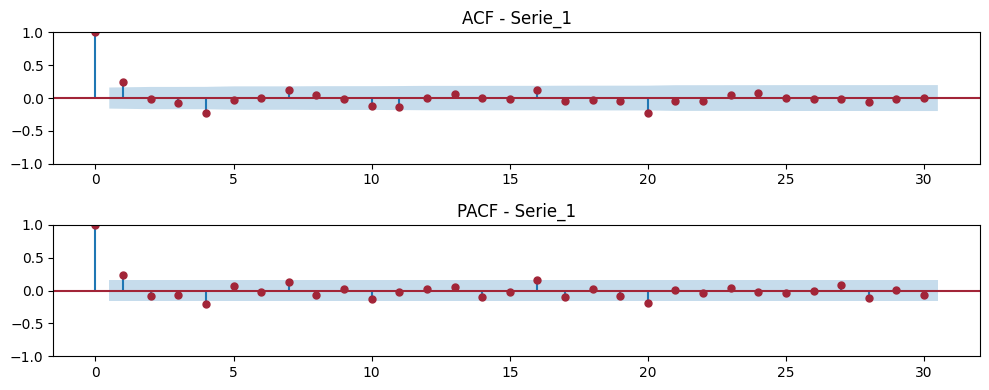

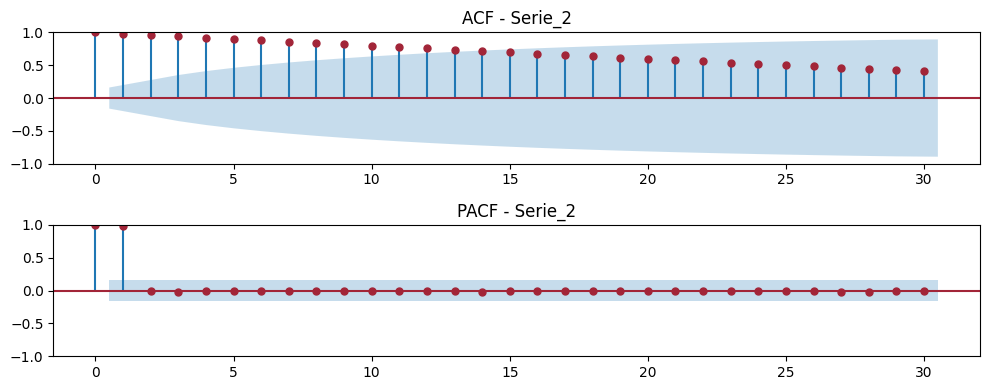

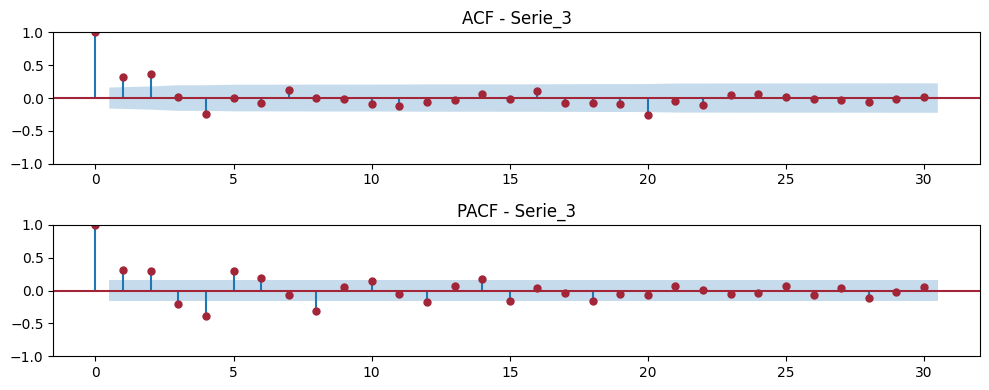

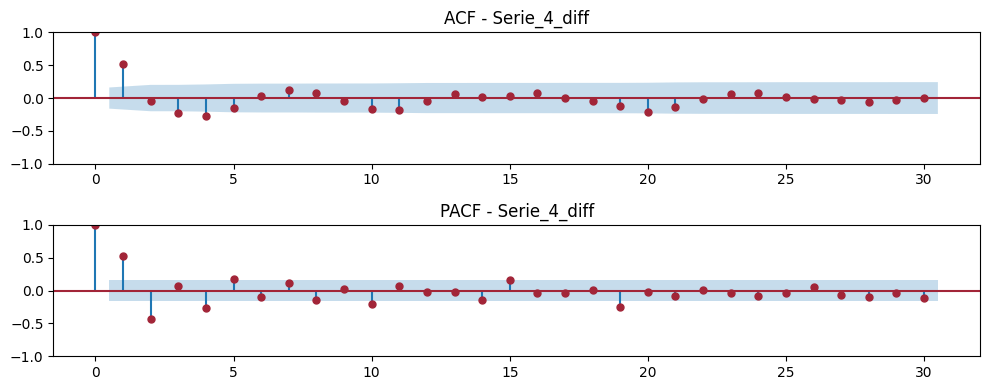

In [10]:
# Autocorrelation Function ( ACF ) and Partial Autocorrelation Function (PACF)

columns = ['Serie_1', 'Serie_2', 'Serie_3', 'Serie_4_diff']

for col in columns:
    plt.figure(figsize=(10, 4))
    
    # Plot ACF
    ax1 = plt.subplot(211)
    plot_acf(df[col].dropna(), lags=30, color = rgb_color,ax=ax1, title=f'ACF - {col}')
    
    # Plot PACF
    ax2 = plt.subplot(212)
    plot_pacf(df[col].dropna(), lags=30,color = rgb_color ,ax=ax2, title=f'PACF - {col}')
    
    plt.tight_layout()
    plt.show()

In [ ]:
# Series 1
# ACF: The autocorrelation values mostly lie within the confidence bounds; 
#      there is no clearly significant spike.
# PACF: Likewise, there are no notable spikes that would suggest a strong AR component.
#       Most points are near zero and do not exceed the confidence intervals.
# Interpretation: An initial hypothesis is that the series behaves like white noise 
#                 or a very simple process. We can test models such as ARIMA(0,0,0), 
#                 ARIMA(1,0,0), or ARIMA(0,0,1) and compare their diagnostics (AIC, BIC, residual checks).

# Series 2 (Trend to include)
# ACF: Shows a slow decay across lags, indicating strong persistence and the presence of a deterministic trend.
# PACF: Displays a significant spike at lag 1, followed by values within the confidence bounds.
# Interpretation: This pattern is consistent with a deterministic trend and a possible short-term autoregressive structure.
#                                     Instead of differencing, we include a time trend directly in the model specification.
#                                     A natural starting point is to test ARIMA(1,0,0) and ARIMA(0,0,1) with a trend term included,
#                                         then compare AIC/BIC and perform residual diagnostics to select the most appropriate model.

# Series 3
# ACF: A notable positive spike at lag 1, followed by a rapid decay that stays within the confidence bounds.
# PACF: Similarly, there is a strong spike at lag 1, but no other significant spikes at higher lags.
# Interpretation: This typically indicates an AR(2) process. A good first candidate is ARIMA(2,0,0). 
#                 We would fit that model and check if the residuals are white noise.

# Series 4 (Differenced)
# ACF: Shows a strong spike at lag 1, followed by rapid decay with remaining lags mostly within the confidence bounds.
# PACF: Also displays a significant spike at lag 1, with no major spikes afterward.
# Interpretation: This pattern suggests that a simple AR(1) or MA(1) structure may be sufficient to capture the dynamics
#                              of the differenced series. A good starting point is to test ARIMA(1,1,0) and ARIMA(0,1,1),
#                                       then compare AIC/BIC and residual diagnostics to select the better-fitting model.

##### Step 2: Estimation

In [11]:
# ARIMA(p,d,q) and ARMA(p,q) where d = 0
# Series 1: ARIMA(0,0,0), ARIMA(1,0,0), or ARIMA(0,0,1)
# Series 2: ARIMA(1,0,0) with trend , ARIMA(0,0,1) with trend
# Series 3: ARIMA(2,0,0)
# Series 4: ARIMA(1,1,0) or ARIMA(0,1,1) 

In [12]:
# -------------------------
# Estimation for Series 1 (Stationary)
# Candidate models: ARIMA(0,0,0), ARIMA(1,0,0), ARIMA(0,0,1)
print("Estimating models for Series 1:")

model1_000 = ARIMA(df['Serie_1'].dropna(), order=(0, 0, 0)).fit()
model1_100 = ARIMA(df['Serie_1'].dropna(), order=(1, 0, 0)).fit()
model1_001 = ARIMA(df['Serie_1'].dropna(), order=(0, 0, 1)).fit()

print("Series 1 - ARIMA(0,0,0) AIC:", round(model1_000.aic,2), "BIC:", round(model1_000.bic,2))
print("Series 1 - ARIMA(1,0,0) AIC:", round(model1_100.aic,2), "BIC:", round(model1_100.bic,2))
print("Series 1 - ARIMA(0,0,1) AIC:", round(model1_001.aic,2), "BIC:", round(model1_001.bic))
print("\n--- ARIMA(0,0,1) Summary ---")
print(model1_001.summary())

Estimating models for Series 1:
Series 1 - ARIMA(0,0,0) AIC: 428.73 BIC: 434.74
Series 1 - ARIMA(1,0,0) AIC: 422.0 BIC: 431.01
Series 1 - ARIMA(0,0,1) AIC: 421.05 BIC: 430

--- ARIMA(0,0,1) Summary ---
                               SARIMAX Results                                
Dep. Variable:                Serie_1   No. Observations:                  149
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -207.523
Date:                Wed, 26 Mar 2025   AIC                            421.046
Time:                        00:25:01   BIC                            430.058
Sample:                             0   HQIC                           424.707
                                - 149                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const   

In [15]:
# -------------------------
# Estimation for Series 2 (Non-Stationary with Drift)
# Candidate models: ARIMA(1,0,0) and ARIMA(0,0,1)
print("\nEstimating models for Series 2:")

model2_100 = ARIMA(df['Serie_2'].dropna(), order=(1, 0, 0),trend='t').fit()
model2_001 = ARIMA(df['Serie_2'].dropna(), order=(0, 0, 1), trend='t').fit()

print("Series 2 - ARIMA(1,0,0) AIC:", round(model2_100.aic,2), "BIC:", round(model2_100.bic,2))
print("Series 2 - ARIMA(0,0,1) AIC:", round(model2_001 .aic,), "BIC:", round(model2_001 .bic,2))
print("\n--- ARIMA(1,0,0) Summary ---")
print(model2_100.summary())


Estimating models for Series 2:
Series 2 - ARIMA(1,0,0) AIC: 556.53 BIC: 565.55
Series 2 - ARIMA(0,0,1) AIC: 2679 BIC: 2687.9

--- ARIMA(1,0,0) Summary ---
                               SARIMAX Results                                
Dep. Variable:                Serie_2   No. Observations:                  149
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -275.267
Date:                Wed, 26 Mar 2025   AIC                            556.534
Time:                        00:25:05   BIC                            565.546
Sample:                             0   HQIC                           560.195
                                - 149                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             5.0058      0.165     30.421      0.00

In [14]:
# -------------------------
# Estimation for Series 3 (Stationary)
# Candidate model: ARIMA(2,0,0)
print("\nEstimating model for Series 3:")

model3 = ARIMA(df['Serie_3'].dropna(), order=(2, 0, 0)).fit()
print("Series 3 - ARIMA(2,0,0) AIC:", round(model3.aic,2), "BIC:", round(model3.bic,2))
print("\n--- ARIMA(2,0,0) Summary ---")
print(model3.summary())


Estimating model for Series 3:
Series 3 - ARIMA(2,0,0) AIC: 487.0 BIC: 499.01

--- ARIMA(2,0,0) Summary ---
                               SARIMAX Results                                
Dep. Variable:                Serie_3   No. Observations:                  149
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -239.498
Date:                Wed, 26 Mar 2025   AIC                            486.996
Time:                        00:25:05   BIC                            499.012
Sample:                             0   HQIC                           491.878
                                - 149                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0347      0.211     -0.165      0.869      -0.448       0.378
ar.L1          0.2248 

In [13]:
# -------------------------
# Estimation for Series 4 (Differenced; d=1)
# Candidate models: ARIMA(1,1,0) with drift, ARIMA(0,1,1) with drift
print("\nEstimating models for Series 4 (with drift):")

model4_110 = ARIMA(df['Serie_4_diff'].dropna(), order=(1, 0, 0)).fit()
model4_011 = ARIMA(df['Serie_4_diff'].dropna(), order=(0, 1, 1)).fit()

print("Series 4 - ARIMA(1,1,0) with drift AIC:", round(model4_110.aic,2), "BIC:", round(model4_110.bic,2))
print("Series 4 - ARIMA(0,1,1) with drift AIC:", round(model4_011.aic,2), "BIC:", round(model4_011.bic,2))
print("\n--- ARIMA(1,1,0) with drift Summary ---")
print(model4_110.summary())


Estimating models for Series 4 (with drift):
Series 4 - ARIMA(1,1,0) with drift AIC: 488.0 BIC: 497.0
Series 4 - ARIMA(0,1,1) with drift AIC: 512.35 BIC: 518.33

--- ARIMA(1,1,0) with drift Summary ---
                               SARIMAX Results                                
Dep. Variable:           Serie_4_diff   No. Observations:                  148
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -241.002
Date:                Wed, 26 Mar 2025   AIC                            488.004
Time:                        00:25:04   BIC                            496.996
Sample:                             0   HQIC                           491.658
                                - 148                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const  

##### Step 3: Diagnostic Checking

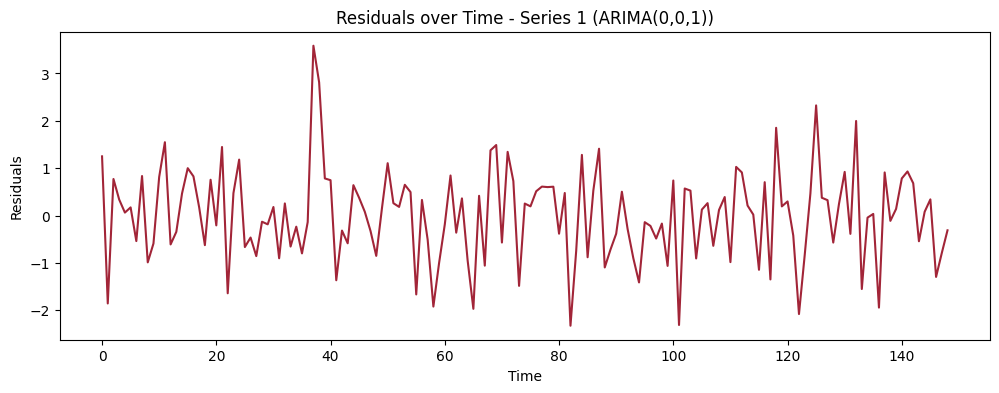

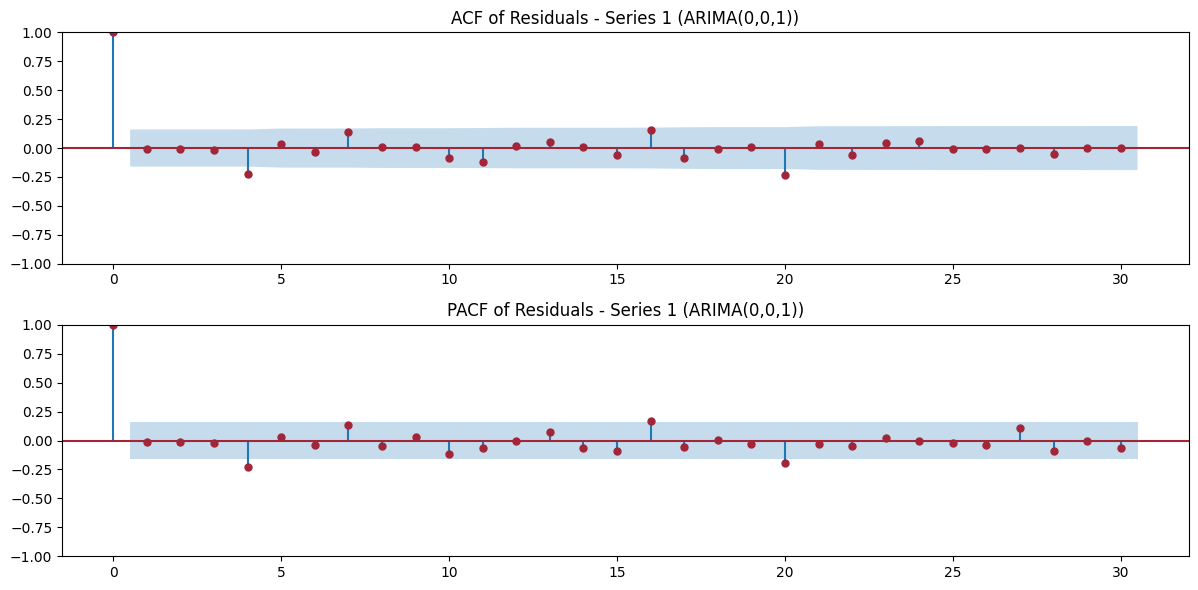

Ljung-Box test results for Series 1 (ARIMA(0,0,1)):
      lb_stat  lb_pvalue
10  12.679339   0.242157

Interpretation:
Since the p-value (0.2422) > 0.05, we fail to reject the null hypothesis.
This suggests that the residuals are uncorrelated (white noise) up to lag 10,
indicating that the model has adequately captured the autocorrelation structure.


In [16]:
# Diagnostic for Series 1: ARIMA(0,0,1)
residuals_s1 = model1_001.resid

# Plot residuals over time
plt.figure(figsize=(12, 4))
plt.plot(residuals_s1, color=rgb_color)
plt.title("Residuals over Time - Series 1 (ARIMA(0,0,1))")
plt.xlabel("Time")
plt.ylabel("Residuals")
plt.show()

# Plot ACF and PACF for residuals
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(residuals_s1, lags=30, color=rgb_color, ax=plt.gca(), 
         title="ACF of Residuals - Series 1 (ARIMA(0,0,1))")
plt.subplot(212)
plot_pacf(residuals_s1, lags=30, color=rgb_color, ax=plt.gca(), 
          title="PACF of Residuals - Series 1 (ARIMA(0,0,1))")
plt.tight_layout()
plt.show()

# Perform Ljung-Box test on residuals (testing up to 10 lags)
lb_test_s1 = acorr_ljungbox(residuals_s1, lags=[10], return_df=True)
print("Ljung-Box test results for Series 1 (ARIMA(0,0,1)):")
print(lb_test_s1)

# Interpret the Ljung-Box test result using an if-statement
p_value_lag10 = lb_test_s1['lb_pvalue'].iloc[0]  # p-value at lag 10
if p_value_lag10 > 0.05:
    print("\nInterpretation:")
    print(f"Since the p-value ({p_value_lag10:.4f}) > 0.05, we fail to reject the null hypothesis.")
    print("This suggests that the residuals are uncorrelated (white noise) up to lag 10,")
    print("indicating that the model has adequately captured the autocorrelation structure.")
else:
    print("\nInterpretation:")
    print(f"Since the p-value ({p_value_lag10:.4f}) <= 0.05, we reject the null hypothesis.")
    print("This implies that there is significant autocorrelation in the residuals up to lag 10,")
    print("which may indicate that the model is not fully adequate.")

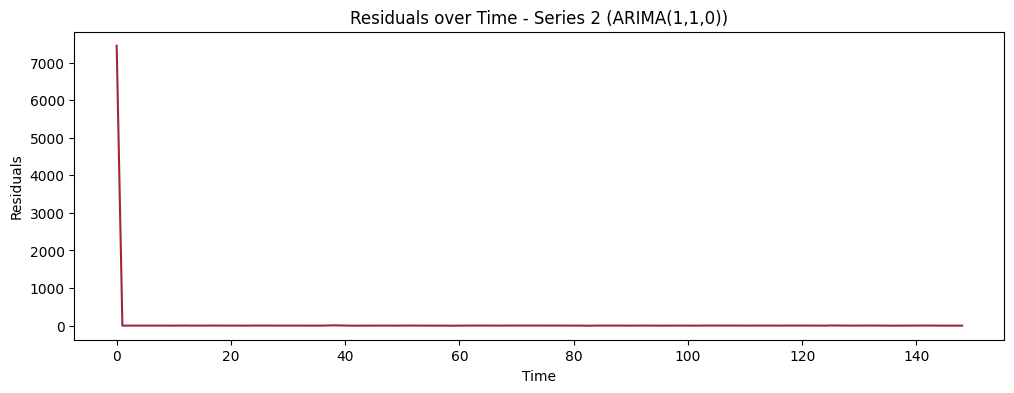

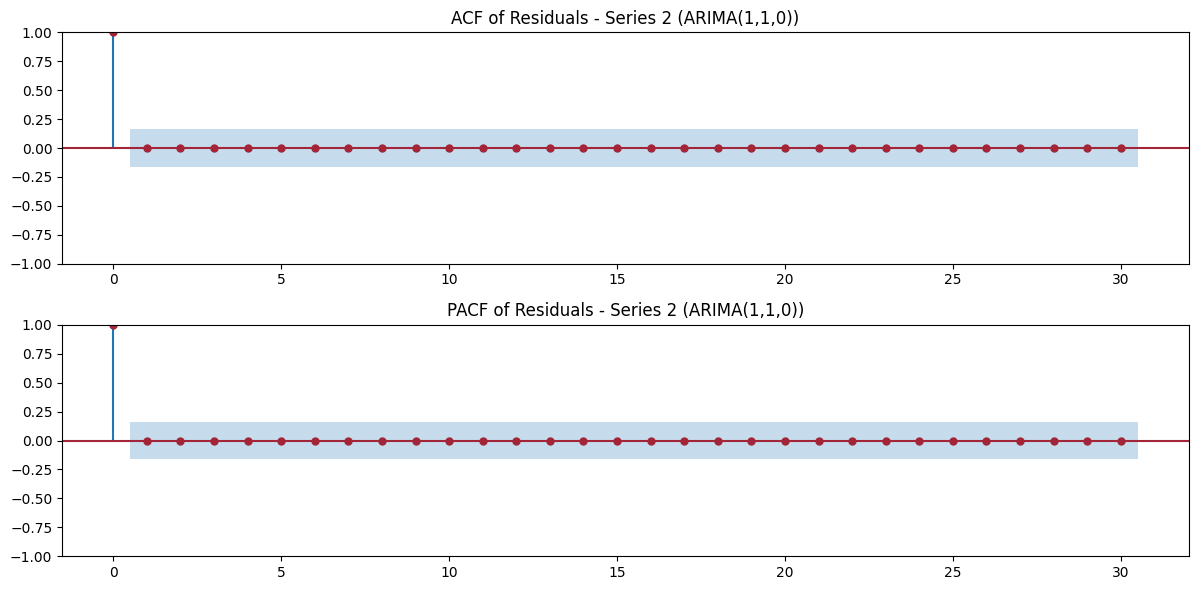

Ljung-Box test results for Series 2 (ARIMA(1,1,0)):
     lb_stat  lb_pvalue
10  0.000148        1.0

Interpretation:
Since the p-value (1.0000) > 0.05, we fail to reject the null hypothesis.
This suggests that the residuals are uncorrelated (white noise) up to lag 10,
indicating that the ARIMA(1,1,0) model for Series 2 has adequately captured the autocorrelation structure.


In [19]:
# Diagnostic for Series 2: ARIMA(1,1,0)
residuals_s2 = model2_100.resid

# Plot residuals over time
plt.figure(figsize=(12, 4))
plt.plot(residuals_s2, color=rgb_color)
plt.title("Residuals over Time - Series 2 (ARIMA(1,1,0))")
plt.xlabel("Time")
plt.ylabel("Residuals")
plt.show()

# Plot ACF and PACF for residuals
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(residuals_s2, lags=30, color=rgb_color, ax=plt.gca(), 
         title="ACF of Residuals - Series 2 (ARIMA(1,1,0))")
plt.subplot(212)
plot_pacf(residuals_s2, lags=30, color=rgb_color, ax=plt.gca(), 
          title="PACF of Residuals - Series 2 (ARIMA(1,1,0))")
plt.tight_layout()
plt.show()

# Perform Ljung-Box test on residuals (testing up to 10 lags)
lb_test_s2 = acorr_ljungbox(residuals_s2, lags=[10], return_df=True)
print("Ljung-Box test results for Series 2 (ARIMA(1,1,0)):")
print(lb_test_s2)

# Interpret the Ljung-Box test result using an if-statement
p_value_s2 = lb_test_s2['lb_pvalue'].iloc[0]  # p-value for lag 10
if p_value_s2 > 0.05:
    print("\nInterpretation:")
    print(f"Since the p-value ({p_value_s2:.4f}) > 0.05, we fail to reject the null hypothesis.")
    print("This suggests that the residuals are uncorrelated (white noise) up to lag 10,")
    print("indicating that the ARIMA(1,1,0) model for Series 2 has adequately captured the autocorrelation structure.")
else:
    print("\nInterpretation:")
    print(f"Since the p-value ({p_value_s2:.4f}) <= 0.05, we reject the null hypothesis.")
    print("This implies that there is significant autocorrelation in the residuals up to lag 10,")
    print("which may indicate that the ARIMA(1,1,0) model for Series 2 needs further refinement.")


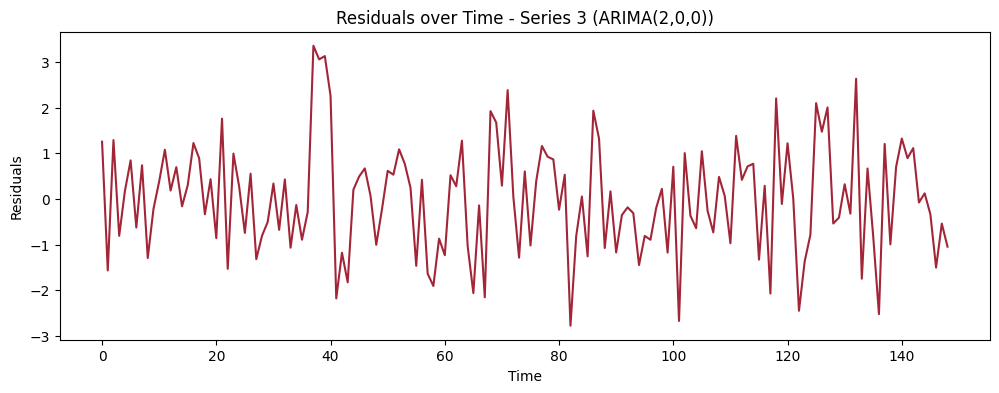

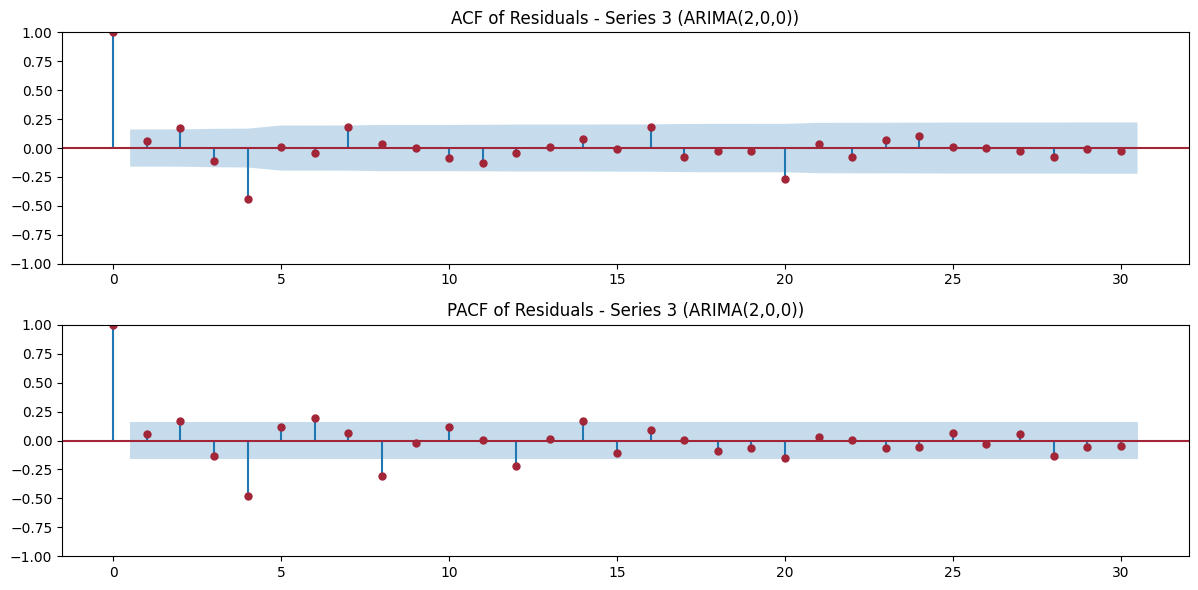

Ljung-Box test results for Series 3 (ARIMA(2,0,0)):
      lb_stat  lb_pvalue
10  44.013027   0.000003

Interpretation:
Since the p-value (0.0000) <= 0.05, we reject the null hypothesis.
This implies that there is significant autocorrelation in the residuals up to lag 10,
which may indicate that the ARIMA(2,0,0) model for Series 3 needs further refinement.


In [18]:
# Diagnostic for Series 3: ARIMA(2,0,0)
residuals_s3 = model3.resid

# Plot residuals over time
plt.figure(figsize=(12, 4))
plt.plot(residuals_s3, color=rgb_color)
plt.title("Residuals over Time - Series 3 (ARIMA(2,0,0))")
plt.xlabel("Time")
plt.ylabel("Residuals")
plt.show()

# Plot ACF and PACF for residuals
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(residuals_s3, lags=30, color=rgb_color, ax=plt.gca(),
         title="ACF of Residuals - Series 3 (ARIMA(2,0,0))")
plt.subplot(212)
plot_pacf(residuals_s3, lags=30, color=rgb_color, ax=plt.gca(),
          title="PACF of Residuals - Series 3 (ARIMA(2,0,0))")
plt.tight_layout()
plt.show()

# Perform Ljung-Box test on residuals (testing up to 10 lags)
lb_test_s3 = acorr_ljungbox(residuals_s3, lags=[10], return_df=True)
print("Ljung-Box test results for Series 3 (ARIMA(2,0,0)):")
print(lb_test_s3)

# Interpret the Ljung-Box test result using an if-statement
p_value_s3 = lb_test_s3['lb_pvalue'].iloc[0]  # p-value for lag 10
if p_value_s3 > 0.05:
    print("\nInterpretation:")
    print(f"Since the p-value ({p_value_s3:.4f}) > 0.05, we fail to reject the null hypothesis.")
    print("This suggests that the residuals are uncorrelated (white noise) up to lag 10,")
    print("indicating that the ARIMA(2,0,0) model for Series 3 has adequately captured the autocorrelation structure.")
else:
    print("\nInterpretation:")
    print(f"Since the p-value ({p_value_s3:.4f}) <= 0.05, we reject the null hypothesis.")
    print("This implies that there is significant autocorrelation in the residuals up to lag 10,")
    print("which may indicate that the ARIMA(2,0,0) model for Series 3 needs further refinement.")


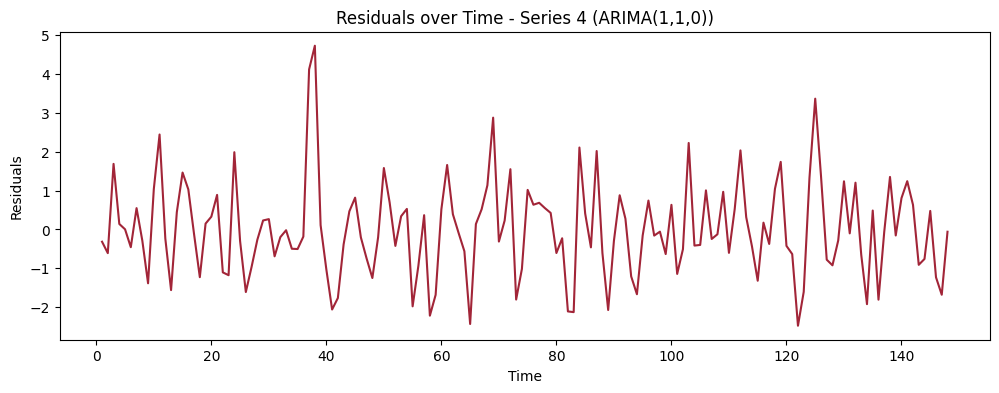

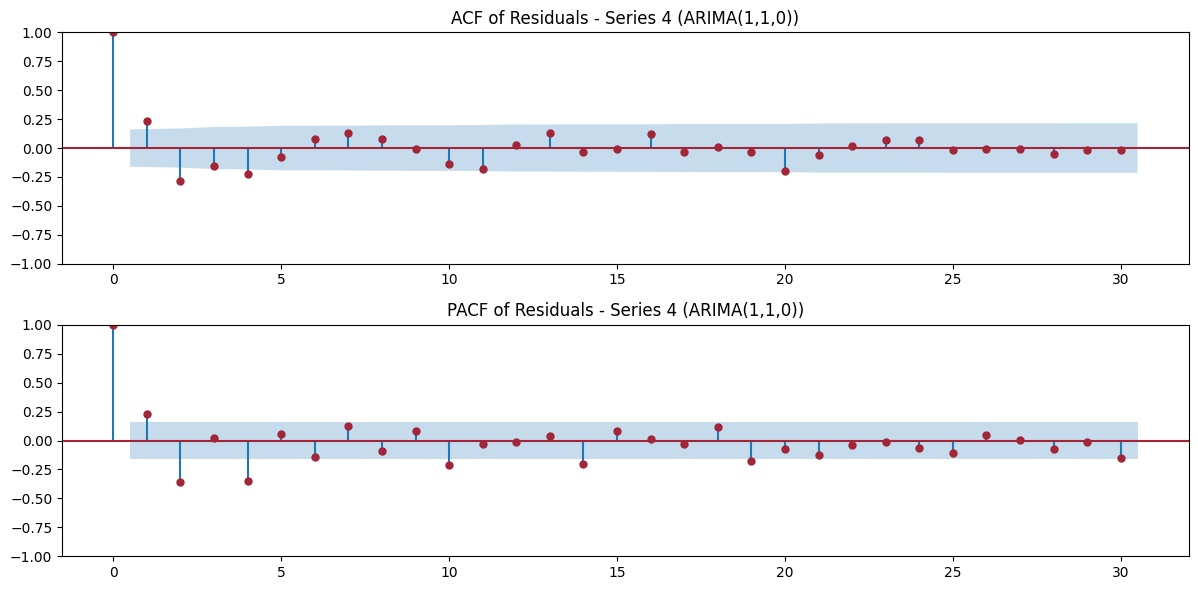

Ljung-Box test results for Series 4 (ARIMA(1,0,0)):
      lb_stat  lb_pvalue
10  40.655274   0.000013

Interpretation:
Since the p-value (0.0000) <= 0.05, we reject the null hypothesis.
This implies that there is significant autocorrelation in the residuals up to lag 10,
which may indicate that the ARIMA(1,1,0) model for Series 4 needs further refinement.


In [17]:
# Diagnostic for Series 4: ARIMA(1,1,0)
residuals_s4 = model4_110.resid

# Plot residuals over time
plt.figure(figsize=(12, 4))
plt.plot(residuals_s4, color=rgb_color)
plt.title("Residuals over Time - Series 4 (ARIMA(1,1,0))")
plt.xlabel("Time")
plt.ylabel("Residuals")
plt.show()

# Plot ACF and PACF for residuals
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(residuals_s4, lags=30, color=rgb_color, ax=plt.gca(),
         title="ACF of Residuals - Series 4 (ARIMA(1,1,0))")
plt.subplot(212)
plot_pacf(residuals_s4, lags=30, color=rgb_color, ax=plt.gca(),
          title="PACF of Residuals - Series 4 (ARIMA(1,1,0))")
plt.tight_layout()
plt.show()

# Perform Ljung-Box test on residuals (testing up to 10 lags)
lb_test_s4 = acorr_ljungbox(residuals_s4, lags=[10], return_df=True)
print("Ljung-Box test results for Series 4 (ARIMA(1,0,0)):")
print(lb_test_s4)

# Interpret the Ljung-Box test result using an if-statement
p_value_s4 = lb_test_s4['lb_pvalue'].iloc[0]  # p-value for lag 10
if p_value_s4 > 0.05:
    print("\nInterpretation:")
    print(f"Since the p-value ({p_value_s4:.4f}) > 0.05, we fail to reject the null hypothesis.")
    print("This suggests that the residuals are uncorrelated (white noise) up to lag 10,")
    print("indicating that the ARIMA(1,1,0) model for Series 4 has adequately captured the autocorrelation structure.")
else:
    print("\nInterpretation:")
    print(f"Since the p-value ({p_value_s4:.4f}) <= 0.05, we reject the null hypothesis.")
    print("This implies that there is significant autocorrelation in the residuals up to lag 10,")
    print("which may indicate that the ARIMA(1,1,0) model for Series 4 needs further refinement.")

In [20]:
# Series 1: ARIMA(0,0,1)
# Series 2: ARIMA(1,1,0)
# Series 3: ARIMA(2,0,0)
# Series 4: ARIMA(1,1,0) with drift

### Question 2

#### i. Retrieve the following data from the IPEADATA website:
- (i) Gross Domestic Product (GDP) at market prices: chained index (average 1995 = 100);
- (ii) IPCA - general - index (Dec. 1993 = 100).

Plot the series.

In [21]:
# Here we use a keyword to search for available time series (e.g., 'PIB'), or browse them manually on the IPEA website
ipea.metadata()

# GDP series
ipea.describe('SCN104_PIBPM104')

,PIB - preços de mercado - índice real encadeado (média 1995 = 100)
Name,PIB - preços de mercado - índice real encadead...
Code,SCN104_PIBPM104
Big Theme,Macroeconômico
Theme code,8
Source,Instituto Brasileiro de Geografia e Estatístic...
Source acronym,IBGE/SCN Trim.
Comment,O produto interno bruto (PIB) é o total dos be...
Last update,2025-03-07T13:32:00.727-03:00
Frequency,Trimestral
Measure,-


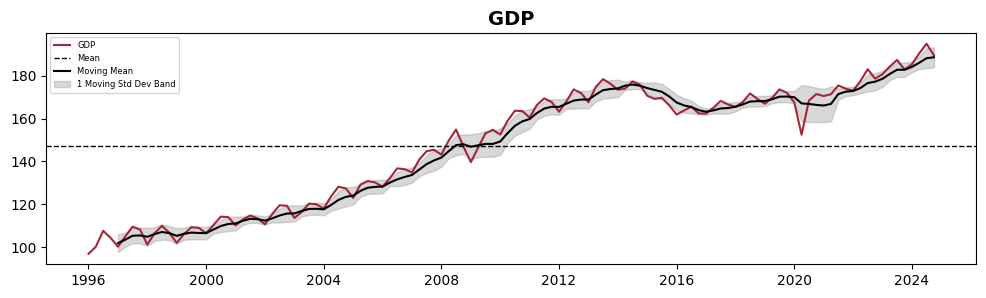

In [22]:
gdp = ipea.timeseries('SCN104_PIBPM104')

gdp = gdp.rename(columns={
    'RAW DATE': 'date',
    'VALUE (-)': 'GDP',
    'CODE': 'code',
    'DAY': 'day',
    'MONTH': 'month',
    'YEAR': 'year'
})
################ Plot ################
# Graph for specific serie
column = "GDP"

# Define the moving window size
window_size = 5

# Calculate moving average and moving standard deviation
gdp['Moving_Mean'] = gdp[column].rolling(window=window_size).mean() # Not using
gdp['Moving_Std'] = gdp[column].rolling(window=window_size).std()

# Calculate mean and standard deviation
mean_value = gdp[column].mean()
std_dev = gdp[column].std()

# Create the plot
plt.figure(figsize=(12, 3))
plt.plot(gdp.index, gdp[column], color=rgb_color, linewidth=1.5, label="GDP")
plt.axhline(mean_value, color='black', linestyle='--', linewidth=1, label='Mean')  # Dotted line for mean

# Plot standard deviation bands
#plt.fill_between(gdp.index, mean_value - std_dev, mean_value + std_dev, color='gray', alpha=0.3, label='1 Std Dev Band')

# Plot moving average
plt.plot(gdp.index, gdp['Moving_Mean'], color='black', linewidth=1.5, linestyle='-', label="Moving Mean")

# Plot moving standard deviation bands
plt.fill_between(gdp.index, 
                 gdp['Moving_Mean'] - gdp['Moving_Std'], 
                 gdp['Moving_Mean'] + gdp['Moving_Std'], 
                 color='grey', alpha=0.3, label='1 Moving Std Dev Band')

# Add titles and labels
plt.title(column, fontsize=14, fontweight='bold')
plt.xlabel('', fontsize=12)
plt.ylabel('', fontsize=14)
plt.legend(fontsize = 6)
plt.show()

In [23]:
# IPCA series
ipea.timeseries('PRECOS12_IPCA12')

,CODE,RAW DATE,DAY,MONTH,YEAR,VALUE (-)
DATE,,,,,,
1979-12-01,PRECOS12_IPCA12,1979-12-01T00:00:00-02:00,1,12,1979,7.618300e-09
1980-01-01,PRECOS12_IPCA12,1980-01-01T00:00:00-02:00,1,1,1980,8.122300e-09
1980-02-01,PRECOS12_IPCA12,1980-02-01T00:00:00-02:00,1,2,1980,8.497300e-09
1980-03-01,PRECOS12_IPCA12,1980-03-01T00:00:00-03:00,1,3,1980,9.010400e-09
1980-04-01,PRECOS12_IPCA12,1980-04-01T00:00:00-03:00,1,4,1980,9.486700e-09
...,...,...,...,...,...,...
2024-10-01,PRECOS12_IPCA12,2024-10-01T00:00:00-03:00,1,10,2024,7.036330e+03
2024-11-01,PRECOS12_IPCA12,2024-11-01T00:00:00-03:00,1,11,2024,7.063770e+03
2024-12-01,PRECOS12_IPCA12,2024-12-01T00:00:00-03:00,1,12,2024,7.100500e+03


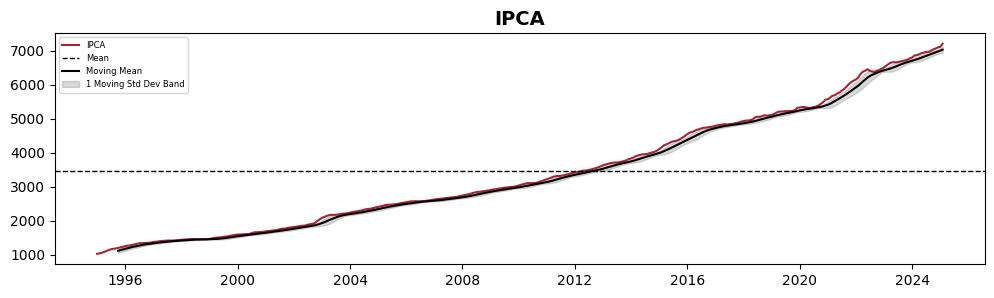

In [24]:
ipca = ipea.timeseries('PRECOS12_IPCA12')

ipca = ipca.rename(columns={
    'RAW DATE': 'date',
    'VALUE (-)': 'IPCA',
    'CODE': 'code',
    'DAY': 'day',
    'MONTH': 'month',
    'YEAR': 'year'
})
################ Plot ################

# Graph for specific serie
column = "IPCA"

ipca = ipca[ipca.index >= '1995-01-01']

# Define the moving window size
window_size = 10

# Calculate moving average and moving standard deviation
ipca['Moving_Mean'] = ipca[column].rolling(window=window_size).mean() # Not using
ipca['Moving_Std'] = ipca[column].rolling(window=window_size).std()

# Calculate mean and standard deviation
mean_value = ipca[column].mean()
std_dev = ipca[column].std()

# Create the plot
plt.figure(figsize=(12, 3))
plt.plot(ipca.index, ipca[column], color=rgb_color, linewidth=1.5, label="IPCA")
plt.axhline(mean_value, color='black', linestyle='--', linewidth=1, label='Mean')  # Dotted line for mean

# Plot standard deviation bands
#plt.fill_between(ipca.index, mean_value - std_dev, mean_value + std_dev, color='gray', alpha=0.3, label='1 Std Dev Band')

# Plot moving average
plt.plot(ipca.index, ipca['Moving_Mean'], color='black', linewidth=1.5, linestyle='-', label="Moving Mean")

# Plot moving standard deviation bands
plt.fill_between(ipca.index, 
                 ipca['Moving_Mean'] - ipca['Moving_Std'], 
                 ipca['Moving_Mean'] + ipca['Moving_Std'], 
                 color='grey', alpha=0.3, label='1 Moving Std Dev Band')

# Add titles and labels
plt.title(column, fontsize=14, fontweight='bold')
plt.xlabel('', fontsize=12)
plt.ylabel('', fontsize=14)
plt.legend(fontsize = 6)
plt.show()

#### ii. Step 2: 
Using the program of your choice, apply the Box-Jenkins methodology: identification, estimation, and diagnosis.
Ignore the seasonality of inflation for now (or use a SARIMA model).

##### Check whether the series exhibit a trend. If they do, you must use one of two approaches before proceeding:
- Remove it before applying the BJ methodology.  
- Include the trend, if applicable, in the model estimation.


Testing for Stationarity Using the Dickey-Fuller Method

In [25]:
# Options for the regression parameter:
# 'c'   : constant only (default)
# 'ct'  : constant and trend
# 'ctt' : constant, trend, and quadratic trend
# 'nc'  : no constant, no trend

# Analyze GDP
print("=== Analyzing GDP ===")
result = adfuller(gdp['GDP'].dropna(), regression='ct')
adf_stat = result[0]
p_value = result[1]
print(f'ADF Statistic: {adf_stat}')
print(f'p-value: {p_value}')
if p_value > 0.05:
    print("-> The series is NOT stationary (p-value > 0.05). Differentiation may be required.")
else:
    print("-> The series is stationary (p-value ≤ 0.05).")


# Analyze IPCA
print("=== Analyzing IPCA ===")
result = adfuller(ipca['IPCA'].dropna(), regression='ct')
adf_stat = result[0]
p_value = result[1]
print(f'ADF Statistic: {adf_stat}')
print(f'p-value: {p_value}')
if p_value > 0.05:
    print("-> The series is NOT stationary (p-value > 0.05). Differentiation may be required.")
else:
    print("-> The series is stationary (p-value ≤ 0.05).")

=== Analyzing GDP ===
ADF Statistic: -1.9354258740739483
p-value: 0.636119964088074
-> The series is NOT stationary (p-value > 0.05). Differentiation may be required.
=== Analyzing IPCA ===
ADF Statistic: 0.808128520692156
p-value: 1.0
-> The series is NOT stationary (p-value > 0.05). Differentiation may be required.


##### Apply the Box-Jenkins methodology: identify, estimate, and verify (conduct diagnostic tests)

Step 1: Identification

In this identification step, we define the AR (p) and MA (q) parameters for each series based on their stationarity and the approach used for trend treatment

In [27]:
# Removing the trend by applying the first difference for GDP
gdp['GDP_diff'] = gdp['GDP'].diff(1)
gdp['GDP_diff'] = gdp['GDP_diff'].dropna()

result_diff = adfuller(gdp['GDP_diff'].dropna())
print("ADF Statistic:", result_diff[0])
p_value_diff = result_diff[1]
print("p-value:", p_value_diff)
if p_value_diff > 0.05:
    print("- The series is NOT stationary (p-value > 0.05). Further differencing or modeling steps may be required.")
else:
    print("- The series is stationary (p-value ≤ 0.05).")


# Removing the trend by applying the first difference for 

ipca['IPCA_diff'] = ipca['IPCA'].diff(1)
ipca['IPCA_diff'] = ipca['IPCA_diff'].dropna()

result_diff = adfuller(ipca['IPCA_diff'].dropna())
print("ADF Statistic:", result_diff[0])
p_value_diff = result_diff[1]
print("p-value:", p_value_diff)
if p_value_diff > 0.05:
    print("- The series is NOT stationary (p-value > 0.05). Further differencing or modeling steps may be required.")
else:
    print("- The series is stationary (p-value ≤ 0.05).")

ADF Statistic: -4.598985722120003
p-value: 0.000129726812964387
- The series is stationary (p-value ≤ 0.05).
ADF Statistic: -3.109616069005091
p-value: 0.025849692508199892
- The series is stationary (p-value ≤ 0.05).


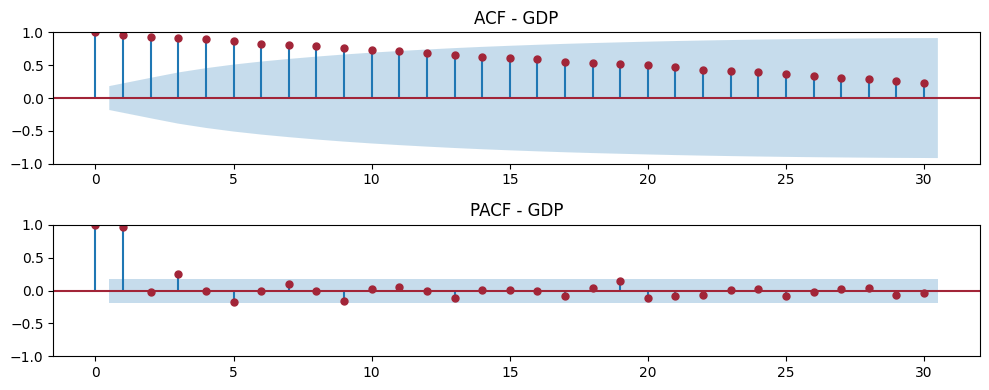

In [28]:
# Autocorrelation Function ( ACF ) and Partial Autocorrelation Function (PACF) for GDP

column = 'GDP'

plt.figure(figsize=(10, 4))

# Plot ACF
ax1 = plt.subplot(211)
plot_acf(gdp[column].dropna(), lags=30, color=rgb_color, ax=ax1, title=f'ACF - {column}')

# Plot PACF
ax2 = plt.subplot(212)
plot_pacf(gdp[column].dropna(), lags=30, color=rgb_color, ax=ax2, title=f'PACF - {column}')

plt.tight_layout()
plt.show()

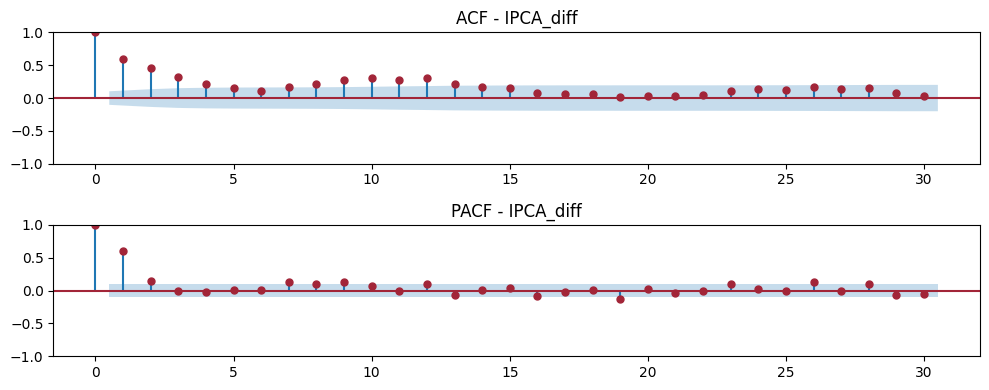

In [29]:
# Autocorrelation Function ( ACF ) and Partial Autocorrelation Function (PACF) for IPCA

column = 'IPCA_diff'

plt.figure(figsize=(10, 4))

# Plot ACF
ax1 = plt.subplot(211)
plot_acf(ipca[column].dropna(), lags=30, color=rgb_color, ax=ax1, title=f'ACF - {column}')

# Plot PACF
ax2 = plt.subplot(212)
plot_pacf(ipca[column].dropna(), lags=30, color=rgb_color, ax=ax2, title=f'PACF - {column}')

plt.tight_layout()
plt.show()

Step 2: Estimation

In [30]:
# -------------------------
# Estimation for GDP (Non-Stationary with Drift)
# Candidate models: ARIMA(1,0,0), ARIMA(0,0,1)
print("\nEstimating models for GDP:")

model_100_1 = ARIMA(gdp['GDP'].dropna(), order=(1, 0, 0), trend= 't').fit()
model_001_1 = ARIMA(gdp['GDP'].dropna(), order=(0, 0, 1), trend= 't').fit()

print("GDP - ARIMA(1,0,0) AIC:", round(model_100_1.aic,2), "BIC:", round(model_100_1.bic,2))
print("GDP - ARIMA(0,0,1) AIC:", round(model_001_1.aic,2), "BIC:", round(model_001_1.bic,2))

print("\n--- ARIMA(1,0,0) Summary ---")
print(model_100_1.summary())


Estimating models for GDP:
GDP - ARIMA(1,0,0) AIC: 677.0 BIC: 685.26
GDP - ARIMA(0,0,1) AIC: 1109.15 BIC: 1117.41

--- ARIMA(1,0,0) Summary ---
                               SARIMAX Results                                
Dep. Variable:                    GDP   No. Observations:                  116
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -335.502
Date:                qua, 26 mar 2025   AIC                            677.003
Time:                        00:25:47   BIC                            685.264
Sample:                    01-01-1996   HQIC                           680.357
                         - 10-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9065      1.374      0.660      0.509      -1.78

In [31]:
# -------------------------
# Estimation for IPCA (Non-Stationary with Drift)
# Candidate models: ARIMA(1,0,0), ARIMA(0,0,1)
print("\nEstimating models for IPCA:")

model_100_2 = ARIMA(ipca['IPCA'].dropna(), order=(1, 0, 0),trend= 't').fit()
model_001_2 = ARIMA(ipca['IPCA'].dropna(), order=(0, 0, 1),trend= 't').fit()

print("IPCA - ARIMA(1,0,0) AIC:", round(model_100_2.aic,2), "BIC:", round(model_100_2.bic,2))
print("IPCA - ARIMA(0,0,1) AIC:", round(model_001_2.aic,2), "BIC:", round(model_001_2.bic,2))

print("\n--- ARIMA(1,0,0) Summary ---")
print(model_100_2.summary())


Estimating models for IPCA:
IPCA - ARIMA(1,0,0) AIC: 3067.7 BIC: 3079.38
IPCA - ARIMA(0,0,1) AIC: 4921.86 BIC: 4933.54

--- ARIMA(1,0,0) Summary ---
                               SARIMAX Results                                
Dep. Variable:                   IPCA   No. Observations:                  362
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1530.851
Date:                qua, 26 mar 2025   AIC                           3067.701
Time:                        00:25:50   BIC                           3079.376
Sample:                    01-01-1995   HQIC                          3072.343
                         - 02-01-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            17.2348      1.287     13.388      0.000      

Step 3: Diagnostic Checking

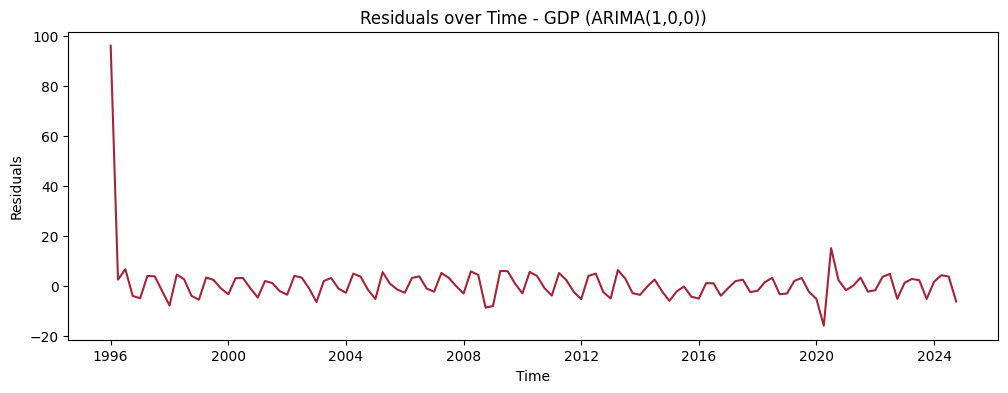

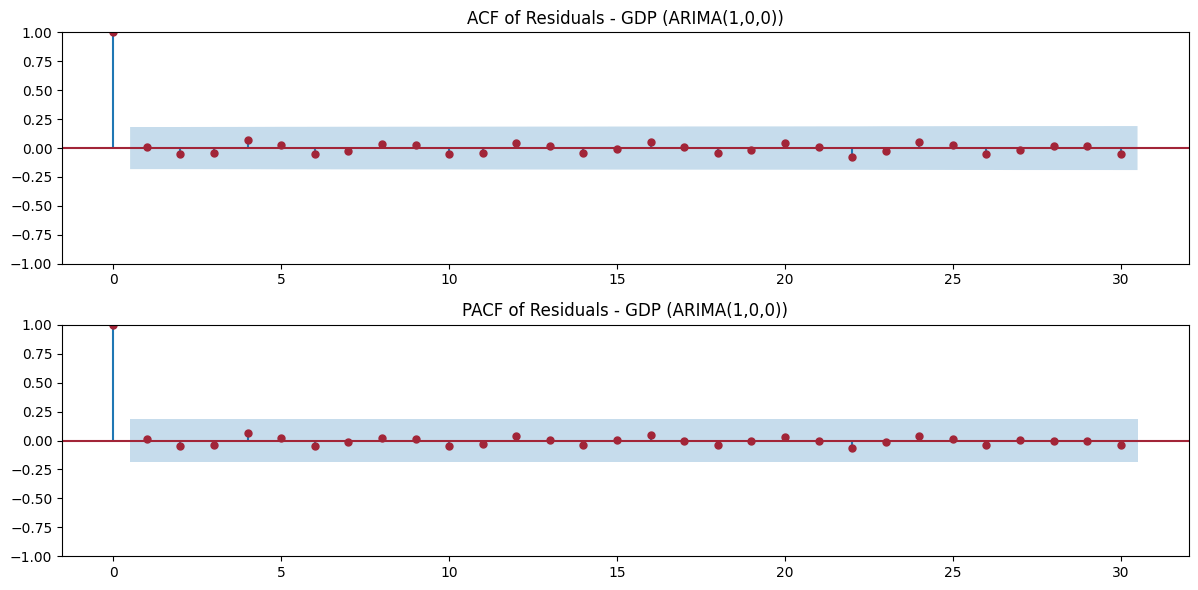

Ljung-Box test results for GDP (ARIMA(1,0,0)):
     lb_stat  lb_pvalue
10  2.165412   0.994908

Interpretation:
Since the p-value (0.9949) > 0.05, we fail to reject the null hypothesis.
This suggests that the residuals are uncorrelated (white noise) up to lag 10,
indicating that the model has adequately captured the autocorrelation structure.


In [32]:
# Diagnostic for GDP: ARIMA(1,0,0)
residuals_s1 = model_100_1.resid

# Plot residuals over time
plt.figure(figsize=(12, 4))
plt.plot(residuals_s1, color = rgb_color)
plt.title("Residuals over Time - GDP (ARIMA(1,0,0))")
plt.xlabel("Time")
plt.ylabel("Residuals")
plt.show()

# Plot ACF and PACF for residuals
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(residuals_s1, lags=30, color=rgb_color, ax=plt.gca(), 
         title="ACF of Residuals - GDP (ARIMA(1,0,0))")
plt.subplot(212)
plot_pacf(residuals_s1, lags=30, color=rgb_color, ax=plt.gca(), 
          title="PACF of Residuals - GDP (ARIMA(1,0,0))")
plt.tight_layout()
plt.show()

# Perform Ljung-Box test on residuals (testing up to 10 lags)
lb_test_s1 = acorr_ljungbox(residuals_s1, lags=[10], return_df=True)
print("Ljung-Box test results for GDP (ARIMA(1,0,0)):")
print(lb_test_s1)

# Interpret the Ljung-Box test result using an if-statement
p_value_lag10 = lb_test_s1['lb_pvalue'].iloc[0]  # p-value at lag 10
if p_value_lag10 > 0.05:
    print("\nInterpretation:")
    print(f"Since the p-value ({p_value_lag10:.4f}) > 0.05, we fail to reject the null hypothesis.")
    print("This suggests that the residuals are uncorrelated (white noise) up to lag 10,")
    print("indicating that the model has adequately captured the autocorrelation structure.")
else:
    print("\nInterpretation:")
    print(f"Since the p-value ({p_value_lag10:.4f}) <= 0.05, we reject the null hypothesis.")
    print("This implies that there is significant autocorrelation in the residuals up to lag 10,")
    print("which may indicate that the model is not fully adequate.")

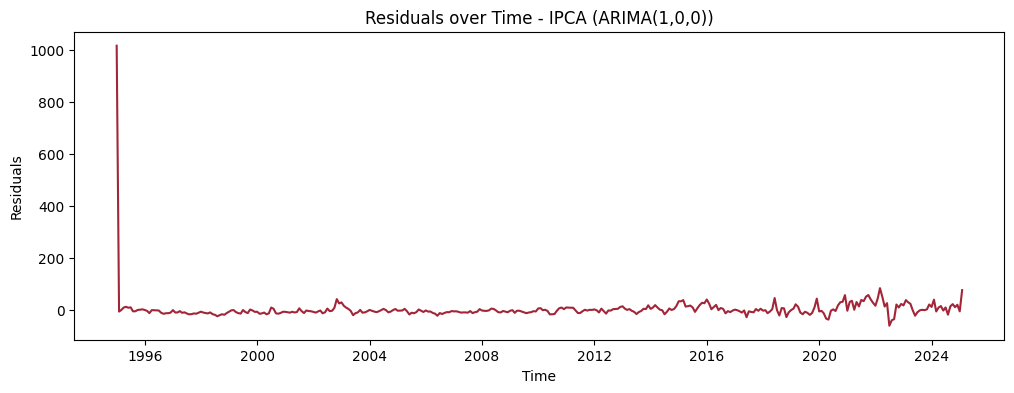

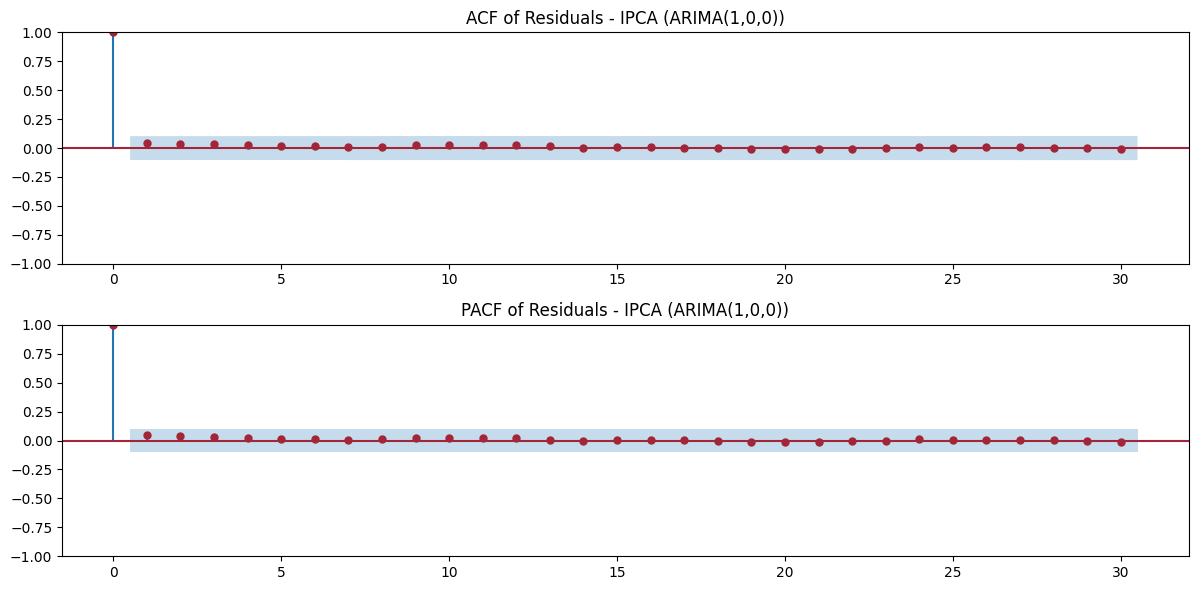

Ljung-Box test results for IPCA (ARIMA(1,0,0)):
     lb_stat  lb_pvalue
10  2.967589   0.982177

Interpretation:
Since the p-value (0.9822) > 0.05, we fail to reject the null hypothesis.
This suggests that the residuals are uncorrelated (white noise) up to lag 10,
indicating that the model has adequately captured the autocorrelation structure.


In [33]:
# Diagnostic for IPCA: ARIMA(1,0,0)
residuals_s2 = model_100_2.resid

# Plot residuals over time
plt.figure(figsize=(12, 4))
plt.plot(residuals_s2, color = rgb_color)
plt.title("Residuals over Time - IPCA (ARIMA(1,0,0))")
plt.xlabel("Time")
plt.ylabel("Residuals")
plt.show()

# Plot ACF and PACF for residuals
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(residuals_s2, lags=30, color=rgb_color, ax=plt.gca(), 
         title="ACF of Residuals - IPCA (ARIMA(1,0,0))")
plt.subplot(212)
plot_pacf(residuals_s2, lags=30, color=rgb_color, ax=plt.gca(), 
          title="PACF of Residuals - IPCA (ARIMA(1,0,0))")
plt.tight_layout()
plt.show()

# Perform Ljung-Box test on residuals (testing up to 10 lags)
lb_test_s2 = acorr_ljungbox(residuals_s2, lags=[10], return_df=True)
print("Ljung-Box test results for IPCA (ARIMA(1,0,0)):")
print(lb_test_s2)

# Interpret the Ljung-Box test result using an if-statement
p_value_lag10 = lb_test_s2['lb_pvalue'].iloc[0]  # p-value at lag 10
if p_value_lag10 > 0.05:
    print("\nInterpretation:")
    print(f"Since the p-value ({p_value_lag10:.4f}) > 0.05, we fail to reject the null hypothesis.")
    print("This suggests that the residuals are uncorrelated (white noise) up to lag 10,")
    print("indicating that the model has adequately captured the autocorrelation structure.")
else:
    print("\nInterpretation:")
    print(f"Since the p-value ({p_value_lag10:.4f}) <= 0.05, we reject the null hypothesis.")
    print("This implies that there is significant autocorrelation in the residuals up to lag 10,")
    print("which may indicate that the model is not fully adequate.")

#### Step 3: Make a forecast for GDP (quarterly) and inflation (monthly) until the end of 2025. Based on these forecasts, calculate:

- The GDP growth forecast for 2025. Let PIB<sup>P</sup><sub>2025</sub> be the value projected by the model for the fourth quarter of 2025, and PIB<sup>m</sup><sub>2024</sub>  be the actual value for the fourth quarter of 2024.

In [34]:
# Here we estimate the model

serie_pib = gdp["GDP"].astype(float).dropna()
serie_pib = serie_pib.sort_index()

model_full = ARIMA(serie_pib, order=(1,0,0), trend='t')
fit_full = model_full.fit()

# Forecast the 4 quarters of 2025
forecast_2025 = fit_full.forecast(steps=4)

# Last observed value (2024Q4)
gdp_2024_Q4 = serie_pib.iloc[-1]

# Forecasted value for 2025Q4
gdp_2025_Q4 = forecast_2025.iloc[-1]

# Calculate GDP growth for 2025
delta_gdp = (gdp_2025_Q4 / gdp_2024_Q4) - 1

# ------------------ Final result

print("\n--- Final Result ---")
print(f"Observed GDP (2024Q4): {gdp_2024_Q4:.2f}")
print(f"Forecasted GDP (2025Q4): {gdp_2025_Q4:.2f}")
print(f"GDP growth in 2025: {delta_gdp:.2%}")



--- Final Result ---
Observed GDP (2024Q4): 189.51
Forecasted GDP (2025Q4): 192.77
GDP growth in 2025: 1.72%


- The IPCA growth forecast for 2025. Let IPCA<sup>P</sup><sub>2025</sub> be the value projected by the model for the december 2025, and IPCA<sub>2024</sub>  be the actual value for december 2024

In [35]:
# Here we estimate the model

serie_ipca = ipca["IPCA"].astype(float).dropna()

model_ipca = ARIMA(serie_ipca, order=(1,0,0), trend='t')
fit_ipca = model_ipca.fit()

# Forecast 12 months ahead (for all of 2025)
forecast_ipca = fit_ipca.forecast(steps=12)

# Last observed value (Dec 2024)
ipca_2024_Dec = serie_ipca.iloc[-1]

# Forecasted value for Dec 2025
ipca_2025_Dec = forecast_ipca.iloc[-1]

# Calculate inflation for 2025
delta_ipca = (ipca_2025_Dec / ipca_2024_Dec) - 1

# ------------------ Final result

print("\n--- Final Result ---")
print(f"Observed IPCA (Dec 2024): {ipca_2024_Dec:.2f}")
print(f"Forecasted IPCA (Dec 2025): {ipca_2025_Dec:.2f}")
print(f"Inflation in 2025: {delta_ipca:.2%}")


--- Final Result ---
Observed IPCA (Dec 2024): 7205.03
Forecasted IPCA (Dec 2025): 7410.20
Inflation in 2025: 2.85%


- Repeat the previous steps for 2025 and 2027. In this case, you will need to use the forecasted values.

How do your forecasts compare to the Central Bank's FOCUS Bulletin projections for GDP and inflation (12-month accumulated variation for December) for 2025, 2026, and 2027?

In [36]:
# Here we estimate the model

serie_pib = gdp["GDP"].astype(float).dropna()
serie_pib = serie_pib.sort_index()

# Estimate the model using all available data
model_full = ARIMA(serie_pib, order=(1,0,0), trend='t')
fit_full = model_full.fit()

# Forecast 12 quarters ahead (2025 to 2027)
forecast = fit_full.forecast(steps=12)

# Last observed value (2024Q4)
gdp_2024_Q4 = serie_pib.iloc[-1]

# Forecasted values for Q4 of each year
gdp_2025_Q4 = forecast.iloc[3]   # 4th forecasted quarter
gdp_2026_Q4 = forecast.iloc[7]   # 8th forecasted quarter
gdp_2027_Q4 = forecast.iloc[11]  # 12th forecasted quarter

# Calculate GDP growth for each year
growth_2025 = (gdp_2025_Q4 / gdp_2024_Q4) - 1
growth_2026 = (gdp_2026_Q4 / gdp_2025_Q4) - 1
growth_2027 = (gdp_2027_Q4 / gdp_2026_Q4) - 1

# ------------------ Final Results

print("\n--- Final Results ---")
print(f"Observed GDP (2024Q4): {gdp_2024_Q4:.2f}")
print(f"Forecasted GDP (2025Q4): {gdp_2025_Q4:.2f}")
print(f"Forecasted GDP (2026Q4): {gdp_2026_Q4:.2f}")
print(f"Forecasted GDP (2027Q4): {gdp_2027_Q4:.2f}")

print(f"\nGDP growth in 2025: {growth_2025:.2%}")
print(f"GDP growth in 2026: {growth_2026:.2%}")
print(f"GDP growth in 2027: {growth_2027:.2%}")


--- Final Results ---
Observed GDP (2024Q4): 189.51
Forecasted GDP (2025Q4): 192.77
Forecasted GDP (2026Q4): 196.03
Forecasted GDP (2027Q4): 199.29

GDP growth in 2025: 1.72%
GDP growth in 2026: 1.69%
GDP growth in 2027: 1.66%


In [37]:
# Here we estimate the model

serie_ipca = ipca["IPCA"].astype(float).dropna()
serie_ipca = serie_ipca.sort_index()

# Estimate the model using all available data
model_ipca = ARIMA(serie_ipca, order=(1,0,0), trend='t')
fit_ipca = model_ipca.fit()

# Forecast 36 months ahead (2025 to 2027)
forecast_ipca = fit_ipca.forecast(steps=36)

# Last observed value (Dec 2024)
ipca_2024_Dec = serie_ipca.iloc[-1]

# Forecasted values for December of each year
ipca_2025_Dec = forecast_ipca.iloc[11]   # Dec 2025 = 12th month (index 11)
ipca_2026_Dec = forecast_ipca.iloc[23]   # Dec 2026 = 24th month (index 23)
ipca_2027_Dec = forecast_ipca.iloc[35]   # Dec 2027 = 36th month (index 35)

# Calculate inflation for each year
inflation_2025 = (ipca_2025_Dec / ipca_2024_Dec) - 1
inflation_2026 = (ipca_2026_Dec / ipca_2025_Dec) - 1
inflation_2027 = (ipca_2027_Dec / ipca_2026_Dec) - 1

# ------------------ Final Results

print("\n--- Final Results ---")
print(f"Observed IPCA (Dec 2024): {ipca_2024_Dec:.2f}")
print(f"Forecasted IPCA (Dec 2025): {ipca_2025_Dec:.2f}")
print(f"Forecasted IPCA (Dec 2026): {ipca_2026_Dec:.2f}")
print(f"Forecasted IPCA (Dec 2027): {ipca_2027_Dec:.2f}")

print(f"\nInflation in 2025: {inflation_2025:.2%}")
print(f"Inflation in 2026: {inflation_2026:.2%}")
print(f"Inflation in 2027: {inflation_2027:.2%}")


--- Final Results ---
Observed IPCA (Dec 2024): 7205.03
Forecasted IPCA (Dec 2025): 7410.20
Forecasted IPCA (Dec 2026): 7615.37
Forecasted IPCA (Dec 2027): 7820.54

Inflation in 2025: 2.85%
Inflation in 2026: 2.77%
Inflation in 2027: 2.69%


 📊 Comparison of Inflation Forecasts (%)

| Year | Your Forecast | FOCUS Forecast | Difference (pp) |
|------|---------------|----------------|-----------------|
| 2025 | 2.85%         | 5.65%          | -2.80           |
| 2026 | 2.77%         | 4.50%          | -1.73           |
| 2027 | 2.69%         | 4.00%          | -1.31           |

**Note:** This gap may reflect the model's strong reliance on recent trends, while the FOCUS forecast includes market expectations and anticipated policy impacts.


📊 Comparison of GDP Growth Forecasts (%)

| Year | Your Forecast | FOCUS Forecast | Difference (pp) |
|------|---------------|----------------|-----------------|
| 2025 | 1.72%         | 1.98%          | -0.26           |
| 2026 | 1.69%         | 1.60%          | +0.09           |
| 2027 | 1.66%         | 1.99%          | -0.33           |

**Note:** Differences are small, suggesting your model captures the general trend, though it slightly underestimates growth in 2025 and 2027.



🦠 How to Handle COVID-19?

Different approaches have been proposed. **Schorfheide and Song (2021)**, for example, argue for removing the observations and not modifying the model to account for extreme values.

Here, I suggest two alternatives:

1. **Include a level dummy** for the most critical months.
2. **Replace the most intense COVID-19 periods**, \( Y^{COVID}_t \), with the simple average of *X* preceding and following months/quarters, and redo item ii of Question 2.


In [40]:
# ----- GDP SERIES PREPARATION -----

serie_pib.index = pd.to_datetime(serie_pib.index, utc=True)
serie_pib.index = serie_pib.index.tz_localize(None)
serie_pib_corrected = serie_pib.copy()

# ----- DEFINE COVID CRITICAL QUARTERS -----

critical_quarters = pd.to_datetime([
    "2020-04-01 03:00:00",
    "2020-07-01 03:00:00",
    "2020-10-01 03:00:00",
    "2021-01-01 03:00:00",
    "2021-04-01 03:00:00",
    "2021-07-01 03:00:00",
    "2021-10-01 03:00:00",
])

X = 2  # number of quarters before and after for smoothing

# ----- SMOOTHING CRITICAL QUARTERS BY AVERAGE -----

for quarter in critical_quarters:
    if quarter in serie_pib_corrected.index:
        pos = serie_pib_corrected.index.get_loc(quarter)
        if pos - X >= 0 and pos + X < len(serie_pib_corrected):
            avg_before = serie_pib_corrected.iloc[pos - X:pos].mean()
            avg_after = serie_pib_corrected.iloc[pos + 1:pos + X + 1].mean()
            corrected_value = (avg_before + avg_after) / 2
            serie_pib_corrected.iloc[pos] = corrected_value

# ----- ESTIMATE THE ARIMA MODEL (CORRECTED SERIES) -----

model_corrected = ARIMA(serie_pib_corrected, order=(1, 0, 0), trend='t')
fit_corrected = model_corrected.fit()

# ----- FORECASTING -----

forecast_corrected = fit_corrected.forecast(steps=12)

# Get forecasted values for Q4 of each year
gdp_2024_Q4 = serie_pib_corrected.iloc[-1]
gdp_2025_Q4 = forecast_corrected.iloc[3]
gdp_2026_Q4 = forecast_corrected.iloc[7]
gdp_2027_Q4 = forecast_corrected.iloc[11]

# Calculate annual GDP growth (based on Q4 of each year)
growth_2025 = (gdp_2025_Q4 / gdp_2024_Q4) - 1
growth_2026 = (gdp_2026_Q4 / gdp_2025_Q4) - 1
growth_2027 = (gdp_2027_Q4 / gdp_2026_Q4) - 1

# ----- FINAL OUTPUT -----

print("\n--- Results with smoothed COVID quarters ---")
print(f"GDP 2024Q4: {gdp_2024_Q4:.2f}")
print(f"GDP 2025Q4: {gdp_2025_Q4:.2f}")
print(f"GDP 2026Q4: {gdp_2026_Q4:.2f}")
print(f"GDP 2027Q4: {gdp_2027_Q4:.2f}")

print(f"\nGDP Growth in 2025: {growth_2025:.2%}")
print(f"GDP Growth in 2026: {growth_2026:.2%}")
print(f"GDP Growth in 2027: {growth_2027:.2%}")




--- Results with smoothed COVID quarters ---
GDP 2024Q4: 189.51
GDP 2025Q4: 192.77
GDP 2026Q4: 196.03
GDP 2027Q4: 199.29

GDP Growth in 2025: 1.72%
GDP Growth in 2026: 1.69%
GDP Growth in 2027: 1.66%


In [41]:
# ----- IPCA SERIES PREPARATION -----

serie_ipca = ipca["IPCA"].astype(float).dropna()
serie_ipca.index = pd.to_datetime(serie_ipca.index, utc=True)
serie_ipca.index = serie_ipca.index.tz_localize(None)
serie_ipca_corrected = serie_ipca.copy()

# ----- DEFINE COVID CRITICAL QUARTERS -----

critical_quarters = pd.to_datetime([
    "2020-04-01 03:00:00",
    "2020-07-01 03:00:00",
    "2020-10-01 03:00:00",
    "2021-01-01 03:00:00",
    "2021-04-01 03:00:00",
    "2021-07-01 03:00:00",
    "2021-10-01 03:00:00",
])

X = 2  # number of quarters before and after for smoothing

# ----- SMOOTHING CRITICAL QUARTERS BY AVERAGE -----

for quarter in critical_quarters:
    if quarter in serie_ipca_corrected.index:
        pos = serie_ipca_corrected.index.get_loc(quarter)
        if pos - X >= 0 and pos + X < len(serie_ipca_corrected):
            avg_before = serie_ipca_corrected.iloc[pos - X:pos].mean()
            avg_after = serie_ipca_corrected.iloc[pos + 1:pos + X + 1].mean()
            corrected_value = (avg_before + avg_after) / 2
            serie_ipca_corrected.iloc[pos] = corrected_value

# ----- ESTIMATE ARIMA MODEL FOR IPCA -----

model_ipca = ARIMA(serie_ipca_corrected, order=(1, 0, 0), trend='t')
fit_ipca = model_ipca.fit()

# ----- FORECASTING -----

forecast_ipca = fit_ipca.forecast(steps=12)

# Forecasts for Q4 of each year
ipca_2024_Q4 = serie_ipca_corrected.iloc[-1]
ipca_2025_Q4 = forecast_ipca.iloc[3]
ipca_2026_Q4 = forecast_ipca.iloc[7]
ipca_2027_Q4 = forecast_ipca.iloc[11]

# Annual inflation (based on Q4 values)
inf_2025 = (ipca_2025_Q4 / ipca_2024_Q4) - 1
inf_2026 = (ipca_2026_Q4 / ipca_2025_Q4) - 1
inf_2027 = (ipca_2027_Q4 / ipca_2026_Q4) - 1

# ----- FINAL RESULTS -----

print("\n--- IPCA with smoothed COVID quarters ---")
print(f"IPCA 2024Q4: {ipca_2024_Q4:.2f}")
print(f"IPCA 2025Q4: {ipca_2025_Q4:.2f}")
print(f"IPCA 2026Q4: {ipca_2026_Q4:.2f}")
print(f"IPCA 2027Q4: {ipca_2027_Q4:.2f}")

print(f"\nInflation 2025: {inf_2025:.2%}")
print(f"Inflation 2026: {inf_2026:.2%}")
print(f"Inflation 2027: {inf_2027:.2%}")


--- IPCA with smoothed COVID quarters ---
IPCA 2024Q4: 7205.03
IPCA 2025Q4: 7273.42
IPCA 2026Q4: 7341.81
IPCA 2027Q4: 7410.20

Inflation 2025: 0.95%
Inflation 2026: 0.94%
Inflation 2027: 0.93%
